# Regression Model

Informally, a model that generates a numerical prediction. (In contrast, a classification model generates a class prediction.) For example, the following are all regression models:



*   A model that predicts a certain house's value, such as 423,000 Euros.
*   A model that predicts a certain tree's life expectancy, such as 23.2 years.
*   A model that predicts the amount of rain that will fall in a certain city over the next six hours, such as 0.18 inches.

Two common types of regression models are:


*   Linear regression, which finds the line that best fits label values to features.
*   Logistic regression, which generates a probability between 0.0 and 1.0 that a system typically then maps to a class prediction.

Not every model that outputs numerical predictions is a regression model. In some cases, a numeric prediction is really just a classification model that happens to have numeric class names. For example, a model that predicts a numeric postal code is a classification model, not a regression model.
[source](https://developers.google.com/machine-learning/glossary#regression_model)



##Problem
You want to train a model that represents a linear relationship between the feature and target vector.

Dataset: **The California housing dataset**. This dataset can be fetched from internet using scikit-learn.

Target variable: The **median house value** for California districts,
expressed in hundreds of thousands of dollars ($100,000).





## Solution
Using regression algorithms some commonly used regression algorithms:

1.   Linear regression
2.   Lasso Regression (L1 Regularization)
3.   Ridge Regression (L2 Regularization)

First, let's start with loading the dataet, data visualization and data prepration.







In [1]:
#load california housing dataset from scikit
from sklearn.datasets import fetch_california_housing

#load dataset
#TODO
california = fetch_california_housing(as_frame=True)

In [2]:
california

{'data':        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
 1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
 2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
 3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 ...       ...       ...       ...        ...         ...       ...       ...   
 20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
 20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
 20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
 20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
 20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   
 
        Longitude 

We can have a first look at the available description

In [3]:
# california housing dataset description using DESCR func
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

### First, let's get familiarized with the data that we have:

In [4]:
#let's take a look at the data
#TODO
california.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In this dataset, we have information regarding the demography (income, population, house occupancy) in the districts, the location of the districts (latitude, longitude), and general information regarding the house in the districts (number of rooms, number of bedrooms, age of the house).

In [5]:
#show description of data
#TODO
california.frame.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Now, let’s have a look to the target to be predicted.

The target contains the median of the house value for each district. Therefore, this problem is a regression problem.

In [6]:
# Target variable
california.frame.MedHouseVal

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

We can see that:

the dataset contains 20,640 samples and 8 features

all features are numerical features encoded as floating number

there is no missing values:

In [9]:
# Missing data
california.frame.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [270]:
# Data frame info
california.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Let’s have a quick look at the distribution of these features by plotting their histograms.

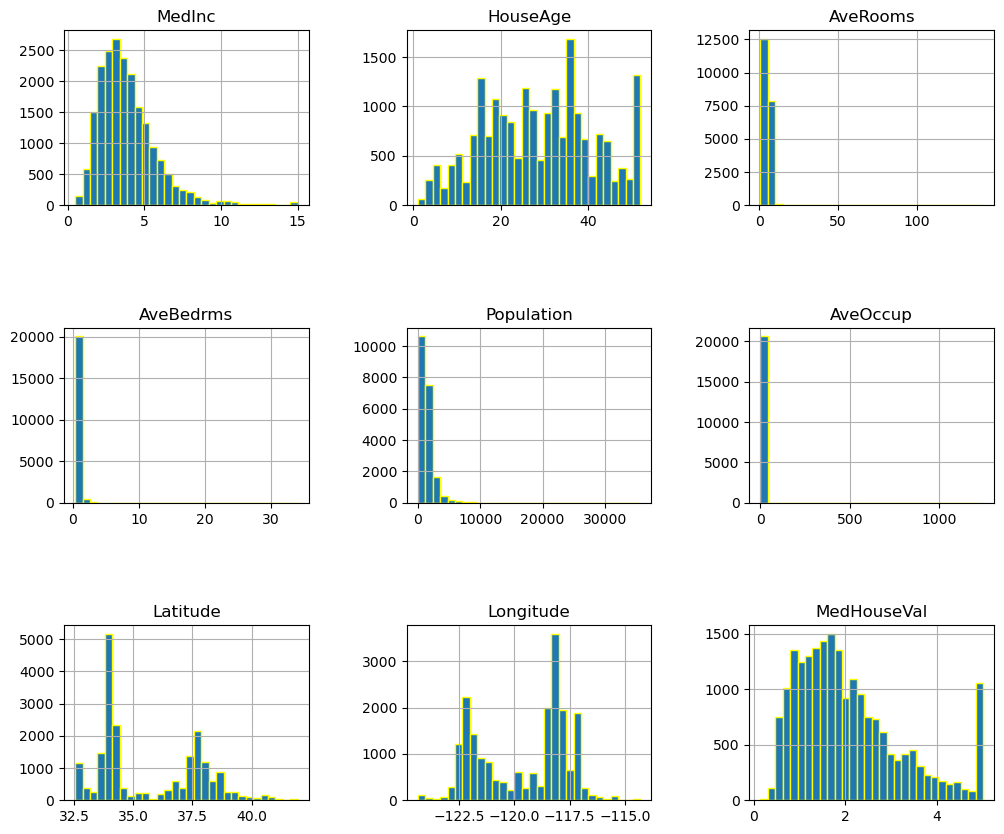

In [11]:
# distribution of features by plotting their histograms
import matplotlib.pyplot as plt

california.frame.hist(figsize=(12, 10), bins=30, edgecolor="yellow")
plt.subplots_adjust(hspace=0.7, wspace=0.4)


Now it is time for exploring more. First of all, we want to visualize the geographical data with latitude and longitude. A good way to do this is to create a scatterplot of all the districts. It is important that you set alpha equal to 0.2, because then the scatterplot has a high density and therefore it is much easier to visualize. Try differnet alpha values to see the changes.

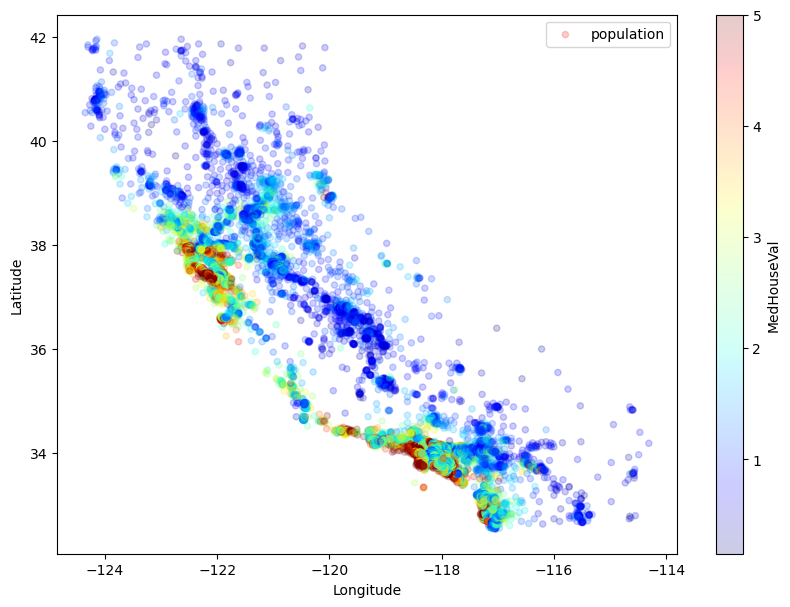

In [14]:
# plot the housing value with respect to longitude and latitude
california.frame.plot(kind="scatter", x="Longitude",y="Latitude", c="MedHouseVal", cmap="jet", colorbar=True, legend=True, sharex=False, figsize=(10,7), label="population", alpha=0.2)
plt.show()

Yes! Map of California! Please note that California's big cities: San Diego, Los Angeles, San Jose, or San Francisco, are located in the east coast!

The above color map shows the house value and the radius of the circles corresponding to the population of the areas.

Based on this plot, we can conclude that:
1. Houses near ocean value more, such as San Diego, Los Angeles, San Jose, and San Francisco.
2. House in high population density area also value more but the effect decreases as we move further away from the ocean.
3. And there are some outliers

## Searching for Correlations:
The housing dataset isn't that large and therefore we can easily compute the correlations between every attribute using the "corr()" method. We will start by looking how much each attribute is correlated to the median house value.

In [273]:
# Corrolations between attributes
corr = california.frame.corr()
corr['MedHouseVal'].sort_values(ascending=True)

Latitude      -0.144160
AveBedrms     -0.046701
Longitude     -0.045967
Population    -0.024650
AveOccup      -0.023737
HouseAge       0.105623
AveRooms       0.151948
MedInc         0.688075
MedHouseVal    1.000000
Name: MedHouseVal, dtype: float64

The coefficient of the correlation ranges from 1 to -1. The closer it is to 1 the more correlated it is and vice versa. Correlations that are close to 0, means that there is no correlation, neither negative or positive. You can see that the median_income is correlated the most with the median house value. Because of that, we will generate a more detailed scatterplot below:

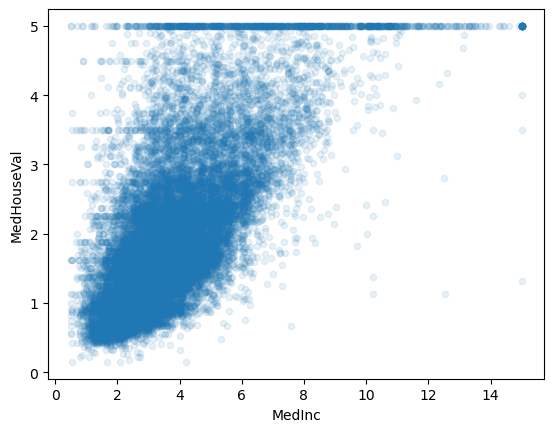

In [17]:
# Correlation between MedInc and MedHouseVal
# TODO
california.frame.plot(kind="scatter", x="MedInc",y="MedHouseVal", alpha=0.1)
plt.show()

## Random Sampling
We can perform random subsampling to reduce the number of data points for plotting, while still capturing the relevant characteristics.

**DataFrame.sample**(n=None, frac=None, replace=False, weights=None, random_state=None, axis=None, ignore_index=False) [source](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html)

Return a random sample of items from an axis of object. You can use random_state for reproducibility.

In [18]:
sample_df = california.frame.sample(n=15, random_state=17)
sample_df


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
18403,5.4741,24.0,6.587799,1.060181,4017.0,3.311624,37.24,-121.84,2.38800
13405,1.9583,7.0,5.362805,1.442073,1064.0,3.243902,34.10,-117.46,1.08800
9539,2.6058,40.0,3.885714,0.914286,785.0,4.485714,37.39,-120.71,0.72700
8668,4.5817,30.0,4.146135,1.108696,1526.0,1.842995,33.82,-118.39,5.00001
9019,8.0137,9.0,7.734673,1.041211,12873.0,3.274739,34.16,-118.78,3.99200
3899,4.5648,36.0,4.864469,1.051282,823.0,3.014652,34.21,-118.52,1.93700
3328,1.9906,29.0,8.970968,1.990323,890.0,2.870968,38.88,-122.72,0.96600
13546,2.0583,34.0,4.526104,1.104418,971.0,3.899598,34.12,-117.30,0.64800
9094,3.3173,18.0,5.645373,1.123669,2837.0,2.323505,34.65,-118.29,2.18400
4209,3.4375,52.0,3.125000,1.050000,99.0,2.475000,34.11,-118.25,1.70000


We can make a final analysis by making a pair plot of all features and the target but dropping the longitude and latitude. We will quantize the target such that we can create proper histogram.

## Feature Scaling
Feature scaling is one of the most important transformations you need to apply, since nearly all machine learning algorithms perform bad when the input numerical attributes have widely varying scales, which is the case at our current dataset. For example, the median incomes range from o to 15, but the total number of rooms from 6 to 39,320. Note that scaling the target values is not required.

There are two common ways:


*   min-max scaling
*   standardization

We use standardization here, feel free to try min-max scaling too.



In [19]:
# standardization
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
california_prep = scaler.fit_transform(california.frame)
california_prep


array([[ 2.34476576,  0.98214266,  0.62855945, ...,  1.05254828,
        -1.32783522,  2.12963148],
       [ 2.33223796, -0.60701891,  0.32704136, ...,  1.04318455,
        -1.32284391,  1.31415614],
       [ 1.7826994 ,  1.85618152,  1.15562047, ...,  1.03850269,
        -1.33282653,  1.25869341],
       ...,
       [-1.14259331, -0.92485123, -0.09031802, ...,  1.77823747,
        -0.8237132 , -0.99274649],
       [-1.05458292, -0.84539315, -0.04021111, ...,  1.77823747,
        -0.87362627, -1.05860847],
       [-0.78012947, -1.00430931, -0.07044252, ...,  1.75014627,
        -0.83369581, -1.01787803]])

## Split the dataset for testing and training

Here, we are randomly splitting the data into training and testing set using train_test_split() method. 80% is kept for training and 20% for testing.

In [22]:
# Split the dataset for testing and training
from sklearn.model_selection import train_test_split
import pandas as pd

california_prep = pd.DataFrame(california_prep)
# train set
X = california_prep.iloc[:,:-1]
# target
y = california_prep.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

##1. Linear Regression

Linear regression is a basic supervised learning algorithm that is widely used for making predictions. It is often taught in introductory statistics courses and is considered a fundamental technique in data analysis. Although it is straightforward and relatively simple compared to other machine learning algorithms, **linear regression remains valuable for predicting quantitative values such as home prices or ages**. Despite its simplicity, linear regression and its variations remain relevant and effective in practical applications.


## Fitting Linear Regression model

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Instantiate a linear regression object
#TODO
regressor = LinearRegression()

# fitting model or training model:
regressor.fit(X_train,y_train)

LinearRegression()

As you know linear regression assumes that the relationship between the features and the target vector is approximately linear. That is, the effect (also called coefficient, weight, or parameter) of the features on the target vector is constant. In our solution, we have trained our model using  8 features.

In [24]:
# Show features

print("Features = ", california.frame.iloc[:,:-1].columns.tolist())

Features =  ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


After we have fit our model, we can view the value of each parameter. Bias or intercept, can be viewed using intercept_:

In [25]:
# View the intercept
print("intercept: ", regressor.intercept_)

intercept:  0.0018009175786550939


And coefficients are shown using coef_:

In [26]:
# View the feature coefficients
print("Features' coefficients: ", regressor.coef_)

Features' coefficients:  [ 0.71342071  0.10135623 -0.21149918  0.24362387 -0.00742107 -0.0427083
 -0.78009525 -0.75381151]


In our dataset, the target variable is the median house value for California houses, expressed in hundreds of thousands of dollars ($100,000). Therefore the price of the first home in the dataset is:

In [27]:
# First value in the target vector (y) multiplied by 100,000
actual_y = y[0]*100000
actual_y

212963.14816680382

In [28]:
# Predict the target value of the first observation, multiplied by 100,000
predicted_y = regressor.predict(X)[0]*100000
predicted_y

179295.18598836145

In [29]:
# Difference between actual and predicted values
err = abs(actual_y - predicted_y)
print("$", round(err))

$ 33668


It means our model was off by $33,668! How can we be sure about this model?

## K-Fold Cross-Validation
As we know we don't want to use the test set until we are confident about our model. But how can we test how our model performs if we can't use the test data ? One way to do this is using **K-Fold Cross-Validation**, which uses part of the training set for training and a part for validation. The following code randomly splits the training set into 10 subset called folds. Then it trains and evaluates 10 times, using every fold once for either training or validation:

In [285]:
# import libraries
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define cross-validation strategy
kf = KFold(n_splits=10, shuffle=True, random_state=42)

cv_scores = cross_val_score(regressor, X, y, cv=kf, scoring='neg_mean_squared_error')

cv_predictions = cross_val_predict(regressor, X, y, cv=kf) # cv_predictions is y preds

# test set
cv_scores_test = cross_val_score(regressor, X_test, y_test, cv=kf, scoring='neg_mean_squared_error')
y_pred_test = regressor.predict(X_test)


**note**: The term neg_mean_squared_error refers to a scoring method used in cross-validation and model evaluation in scikit-learn, where the goal is to minimize the Mean Squared Error (MSE). In scikit-learn, some metrics are defined as being maximized (higher is better), so for metrics like MSE, which are minimized (lower is better), the negative value is used to allow the cross-validation function to maximize a score by minimizing the error.

[more information on Metrics and scoring](https://scikit-learn.org/stable/modules/model_evaluation.html)

The *random_state* parameter in KFold cross-validation is used to control the randomness involved in the shuffling process of the data before splitting it into folds. Setting a random_state ensures that the same data split is used every time the code is run, which helps in achieving reproducibility of the results.

## Evaluate the model

In [286]:
# Calculate evaluation metrics for training set

mae = mean_absolute_error(y, cv_predictions)
mse = mean_squared_error(y, cv_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y, cv_predictions)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Cross-Validated Mean Squared Error (MSE): {-np.mean(cv_scores)}")
print(f"R-squared: {r2}")


Mean Absolute Error (MAE): 0.46106034365834575
Cross-Validated Mean Squared Error (MSE): 0.3999298125600988
R-squared: 0.6000701874399013


# Scores explanation (Standardized data):
Since we scaled (using standardization) the features (independent variables) and target (dependent variable), this can affect the range and magnitude of the evaluation metrics. So, the scores are between 0 and 1.

 **MAE**: 0.46106034365834575, same as MSE, the model's predicted house prices are about 0.46 units away from the actual values in standardized units. This indicates that the model's predictions are fairly close to the actual values.

  **MSE**: 0.3999298125600988, indicates nn average, the squared differences between the predicted and actual house prices across the cross-validation folds are approximately 0.40 in standardized units. This suggests that the model has a reasonably good fit, though not perfect.

**R-squared**: 0.6000701874399013, indicates approximately 60% of the variability in the house prices can be explained by the model's predictors. This indicates a moderate level of explanatory power, with the remaining 40% of the variability due to other factors or noise.

## Conversion to Original Scale

Let's see the evaluation metrics with original house prices (no scaling) to better sense the scores.

In [287]:
# Mean (original data)
original_mean = california.frame.iloc[:,-1].mean()*100000
print("Mean of riginal house prices = $", original_mean)

# Standard Deviation (original data)
original_std = california.frame.iloc[:,-1].std()*100000
print("Standard deviation of riginal house prices = $", original_std)

Mean of riginal house prices = $ 206855.8169089147
Standard deviation of riginal house prices = $ 115395.61587441387


In [288]:
# Convert predictions and actuals back to the original scale
predictions_original_scale = cv_predictions * original_std + original_mean
actuals_original_scale = y * original_std + original_mean

# Calculate evaluation metrics on original scale
mae_original = mean_absolute_error(actuals_original_scale, predictions_original_scale)
mse_original = mean_squared_error(actuals_original_scale, predictions_original_scale)
rmse_original = np.sqrt(mse_original)
r2_original = r2_score(actuals_original_scale, predictions_original_scale)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE) on original scale: ${mae_original}")
print(f"Mean Squared Error (MSE) on original scale: ${mse_original}")
print(f"R-squared on original scale: {r2_original}")

Mean Absolute Error (MAE) on original scale: $53204.34231172372
Mean Squared Error (MSE) on original scale: $5325524638.865202
R-squared on original scale: 0.6000701874399011


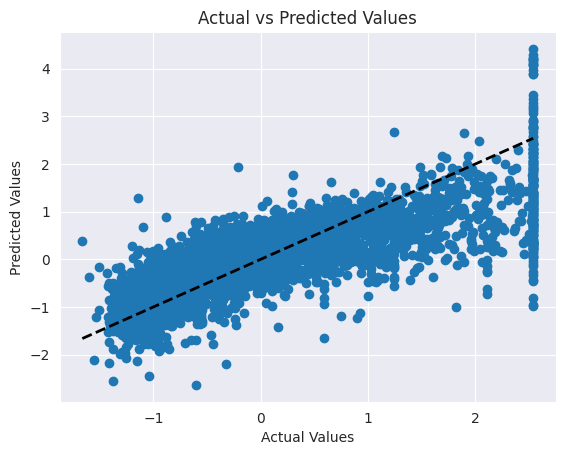

In [289]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()



# 2. LASSO Regression (L1 Regularization)

L1 regularization, also known as Lasso (Least Absolute Shrinkage and Selection Operator), is a technique used in regression models to prevent overfitting and to perform feature selection.

**Regularization**: Regularization adds a penalty to the cost (loss) function (the function the model tries to minimize). This penalty discourages the model from fitting the training data too closely, which helps to generalize better to new data

**L1 Penalty**: In L1 regularization, the penalty is proportional to the sum of the absolute values of the coefficients in cost function.

**Feature Selection**: One of the key features of L1 regularization is that it can shrink some coefficients to exactly zero. This means that the model effectively ignores those features, performing automatic feature selection. This is particularly useful when you have many features, some of which may be irrelevant.

**Controlling Overfitting**: By adding this penalty, L1 regularization prevents the model from becoming too complex and fitting the noise in the training data, thus reducing the risk of overfitting (n undesirable machine learning behavior that occurs when the machine learning model gives accurate predictions for training data but not for unseen data).


*   Example: Predicting medical expenses and identifying the most significant factors affecting costs.


**Note**: In the context of L1 and L2 regularization, "L1" and "L2" refer to different types of norm-based penalties applied to the regression coefficients to prevent overfitting and improve generalization.

## Train the Lasso Regression Model

In [290]:
from sklearn.linear_model import Lasso

# Train the Lasso model
# You can adjust alpha for regularization strength

# instantiate a lasso object
lasso = Lasso(alpha=0.1, random_state=42)

# fit the model on train set
lasso.fit(X, y)


Lasso(alpha=0.1, random_state=42)

## Make Predictions

In [291]:
# Make predictions by the trained lasso model
y_pred_lasso = lasso.predict(X_test)


## Evaluate the Model

In [292]:
# Calculate evaluation metrics
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Print evaluation metrics
print(f"Lasso Regression - Mean Absolute Error (MAE): {mae_lasso}")
print(f"Lasso Regression - Mean Squared Error (MSE): {mse_lasso}")
print(f"Lasso Regression - Root Mean Squared Error (RMSE): {rmse_lasso}")
print(f"Lasso Regression - R-squared: {r2_lasso}")


Lasso Regression - Mean Absolute Error (MAE): 0.5484896719913285
Lasso Regression - Mean Squared Error (MSE): 0.5253175605699383
Lasso Regression - Root Mean Squared Error (RMSE): 0.6324000415560539
Lasso Regression - R-squared: 0.46356522440046233


## Cross-Validation

In [293]:
# Cross-validation
cv_scores_lasso = cross_val_score(lasso, X, y, cv=kf, scoring='neg_mean_squared_error')
cv_predictions = cross_val_predict(lasso, X, y, cv=kf)

cv_mse_lasso = -cv_scores.mean()
cv_rmse_lasso = np.sqrt(cv_mse_lasso)
cv_r2_lasso = r2_score(y, cv_predictions)

print(f"Lasso Regression - Cross-Validated Mean Squared Error (MSE): {cv_mse_lasso}")
print(f"Lasso Regression - Cross-Validated Root Mean Squared Error (RMSE): {cv_rmse_lasso}")
print(f"R-squared: {cv_r2_lasso}")



Lasso Regression - Cross-Validated Mean Squared Error (MSE): 0.3999298125600988
Lasso Regression - Cross-Validated Root Mean Squared Error (RMSE): 0.632400041556054
R-squared: 0.48631441155753363


## Grid Search for optimization
Grid search is a method used for hyperparameter tuning in machine learning. It systematically works through multiple combinations of parameter values, cross-validates each combination, and determines the set of parameters that gives the best performance. The main goal of grid search is to find the optimal hyperparameters for a given model to improve its accuracy or other performance metrics.

Here we use [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) from sklearn.

## Tuning the Alpha Hyperparameter
You can tune the alpha parameter to find the optimal value for the dataset. The alpha hyperparameter determines the strength of regularization applied to the model.

### Effect of Alpha:

High Alpha: A high alpha value increases the penalty on the coefficients, leading to more coefficients being shrunk to zero. This results in a simpler model with potentially fewer features (automatic feature selection).
Low Alpha: A low alpha value reduces the penalty on the coefficients, making the model more similar to ordinary least squares regression with little to no regularization.

In [294]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'alpha': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 1, 10, 100]}

# Perform grid search
grid_search = GridSearchCV(Lasso(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')

# fit grid search
grid_search.fit(X, y)


GridSearchCV(cv=5, estimator=Lasso(random_state=42),
             param_grid={'alpha': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 1, 10,
                                   100]},
             scoring='neg_mean_squared_error')

In [295]:
# Best alpha
best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha: {best_alpha}")

# Train the Lasso model with the best alpha
lasso_best = Lasso(alpha=best_alpha, random_state=42)

# fit the best lasso model
lasso_best.fit(X, y)

# Make predictions and evaluate
y_pred_best = lasso_best.predict(X_test)


Best alpha: 0.01


In [296]:
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Tuned Lasso Regression - Mean Absolute Error (MAE): {mae_best}")
print(f"Tuned Lasso Regression - Mean Squared Error (MSE): {mse_best}")
print(f"Tuned Lasso Regression - Root Mean Squared Error (RMSE): {rmse_best}")
print(f"Tuned Lasso Regression - R-squared: {r2_best}")

Tuned Lasso Regression - Mean Absolute Error (MAE): 0.4679431701516036
Tuned Lasso Regression - Mean Squared Error (MSE): 0.40481142128410896
Tuned Lasso Regression - Root Mean Squared Error (RMSE): 0.6362479243849122
Tuned Lasso Regression - R-squared: 0.5866216166444717


# 3. Ridge Regression (L2 Regularization)
L2 regularization, also known as Ridge regression, is a technique used in regression models to prevent overfitting and improve the model's generalization by adding a penalty term to the loss function. This penalty term is proportional to the square of the magnitude of the coefficients.

*   **L2 Penalty**: In L2 regularization, the penalty is proportional to the sum of the squares of the coefficients of the cost function.

*   **Shrinkage**: The L2 penalty causes the coefficients to be "shrunk" towards zero, but not exactly zero. This means that all features are kept in the model, but their impact is reduced.

*   **Controlling Overfitting**: By adding this penalty, L2 regularization prevents the model from becoming too complex and fitting the noise in the training data, thus reducing the risk of overfitting.


Example: Predicting housing prices with regularization to avoid overfitting on training data.

## Train the Ridge Regression Model

In [297]:
from sklearn.linear_model import Ridge

# instantiate a Ridge object
# You can adjust alpha for regularization strength
ridge = Ridge(alpha=1.0, random_state=42)

# Train the Ridge model
ridge.fit(X, y)


Ridge(random_state=42)

## Make Predictions with Ridge model

In [298]:
# Make predictions
y_pred_ridge = ridge.predict(X_test)


## Evaluate Ridge Model

In [299]:

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred_ridge)
mse = mean_squared_error(y_test, y_pred_ridge)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_ridge)

# Print evaluation metrics
print(f"Ridge Regression - Mean Absolute Error (MAE): {mae}")
print(f"Ridge Regression - Mean Squared Error (MSE): {mse}")
print(f"Ridge Regression - Root Mean Squared Error (RMSE): {rmse}")
print(f"Ridge Regression - R-squared: {r2}")


Ridge Regression - Mean Absolute Error (MAE): 0.462843206293702
Ridge Regression - Mean Squared Error (MSE): 0.3959135031919866
Ridge Regression - Root Mean Squared Error (RMSE): 0.6292165789233359
Ridge Regression - R-squared: 0.5957078400135747


## Tuning the Alpha Parameter using grid search

In [300]:
# Usee parameter grid from. earlier

# Perform grid search
grid_search = GridSearchCV(Ridge(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

# Best alpha
best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha: {best_alpha}")

# Train the Ridge model with the best alpha
ridge_best = Ridge(alpha=best_alpha, random_state=42)
ridge_best.fit(X, y)

# Make predictions and evaluate
y_pred_best = ridge_best.predict(X_test)



Best alpha: 10


## Best Ridge model evaluation

In [301]:
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Tuned Ridge Regression - Mean Absolute Error (MAE): {mae_best}")
print(f"Tuned Ridge Regression - Mean Squared Error (MSE): {mse_best}")
print(f"Tuned Ridge Regression - Root Mean Squared Error (RMSE): {rmse_best}")
print(f"Tuned Ridge Regression - R-squared: {r2_best}")

Tuned Ridge Regression - Mean Absolute Error (MAE): 0.4628541421866201
Tuned Ridge Regression - Mean Squared Error (MSE): 0.39596678935398355
Tuned Ridge Regression - Root Mean Squared Error (RMSE): 0.629258920758366
Tuned Ridge Regression - R-squared: 0.5956534261646974
